# BUSINESS ANALYTICS OF SALES DATA TO DRIVE INSIGHTS

###  Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limit">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### This is a detailed analysis of business data spooled from the database for each month of the year 2019. The data is accessible as a csv file, stored in one folder.

This report will go through 
<ul>
<li><a href="#Import">Import Packages</a></li>
<li><a href="#Gather">Gather Data</a></li>
<li><a href="#Assess">Assess DataFrame</a></li>
<li><a href="#Define">State Business Problems</a></li>
</ul>

<a id='Import'></a>
## Import Packages

First we import some important python packages that will be used for this analysis.. 
By default, my go to is to import pandas, numpy and os which I'll do below and alias them for easy access and readability.

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#read the dataset for the month of June into a dataframe called df using pandas.
df = pd.read_csv("./Monthly_Sales/Sales_June_2019.csv")
df.shape

(13622, 6)

In [3]:
#view a sample (First three) of the june dataset.
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"


<a id='Gather'></a>
## Gather Data

I'll proceed to gather my dataset but firstly, I'll view the number of files I have my data in, after which I'll proceed to join them for my analysis.

In [4]:
files = [file for file in os.listdir('./Monthly_Sales')]

for file in files:
    print (file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


Next, I proceed to join my 12 csv files into one dataframe named Sales_Data using the pandas method `concat` . 

This is similar to the SQL joins which 

In [5]:
Sales_Data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Monthly_Sales/" + file)
    Sales_Data = pd.concat([Sales_Data, df])

Sales_Data.shape

(186850, 6)

In [6]:
Sales_Data = pd.DataFrame(Sales_Data)

<a id='Assess'></a>
## Assess DataFrame

Now that I have my datasets stored as one file, I see that I have large volume of data with few columns. I'll look into the dataset using several functions to further understand the dataset.
Some of the functions I'll be using are:

`info` , `tail` , `describe` , `isna` , `duplicated`, `unique` , `nunique` and others.


In [7]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [8]:
Sales_Data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [9]:
Sales_Data.isna().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
True      True     True              True        True        True                   545
dtype: int64

In [10]:
Sales_Data.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [11]:
Sales_Data.duplicated().sum()

1162

The above code gives me great insight and detailed info on this data.

The comapany had 186850 entries from january to december 2019, out of this entries, only 178438 orders were unique. I also know that only 20 products are sold in this company.

Some things to take note of when I start wrangling are

- Data types of columns like Dates, quantity ordered. 
- Feature engineering 
- 1162 duplicated orders to be dropped
And other needed wrangling actions.

<a id='Define'></a>
## State Business Problems

<ul>
<li><a href="#1">What month had the most sales, and how much was sales was made?</a></li>
<li><a href="#2">What city had the highest number of sales?</a></li>
<li><a href="#3">What is the best time for advertising to increase revenue through customer purchase?</a></li>
<li><a href="#4">What products often sell together?</a></li>
<li><a href="#4">What product sold the most and why?</a></li>
</ul>

<a id='wrangling'></a>
## Data Wrangling

I enjoy using the dot `.` to assess a particular column in my dataframe. This makes codes shorter and easier to read. although, certain things can cause that to bring errors. Things like a space in between and that would force me to do this `Sales_Data['Order ID'].sum()` instead of this `Sales_Data.Order_ID.sum()` So I'll proceed to remove spaces from my column names using the `rename` function and a `lambda` function. I'll also change the column names to lower case. 

    Please note that this is solely based on preference. it can be skipped.

Some feature engineering will also be done here.


<li><a href="#new_col">Feature Engineering</a></li>



In [12]:
#replacing spaces in my columns with underscores.
Sales_Data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [13]:
Sales_Data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Next I drop the detected duplicated.

In [14]:
Sales_Data = Sales_Data.drop_duplicates()

Next I drop nulls and empty records (na) detected in the dataset.

In [15]:
Sales_Data[Sales_Data.isna()]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
11681,NaN,NaN,NaN,NaN,NaN,NaN
11682,NaN,NaN,NaN,NaN,NaN,NaN
11683,NaN,NaN,NaN,NaN,NaN,NaN
11684,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
Sales_Data = Sales_Data.dropna()

In [17]:
Sales_Data.isnull().value_counts()

order_id  product  quantity_ordered  price_each  order_date  purchase_address
False     False    False             False       False       False               185687
dtype: int64

In [18]:
Sales_Data

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Next I change the data type of my columns change date to datetime and the figures to int.

In [19]:
#change my order date column from series to datetime
Sales_Data['order_date'] = pd.to_datetime(Sales_Data['order_date'], errors='coerce')


In [20]:
Sales_Data.dtypes

order_id                    object
product                     object
quantity_ordered            object
price_each                  object
order_date          datetime64[ns]
purchase_address            object
dtype: object

I would also like to change the quantity_ordered column to int.

In [21]:
#check the unique values in the column to be sure they are all numbers.
Sales_Data.quantity_ordered.unique() 

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

I noticed an error showing "Quantity Ordered" as one of the values in the so I intend to remove it from the dataset `query` method of the pandas package, then I use the `drop` method on the queried row to clean the dataset.

In [22]:
Sales_Data.query('quantity_ordered == "Quantity Ordered"')

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
519,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address


In [23]:
Sales_Data.drop(Sales_Data.query('quantity_ordered == "Quantity Ordered"').index, inplace = True)

In [24]:
Sales_Data.query('quantity_ordered == "Quantity Ordered"')

,order_id,product,quantity_ordered,price_each,order_date,purchase_address


In [25]:
Sales_Data.quantity_ordered = Sales_Data.quantity_ordered .astype(int)

In [26]:
Sales_Data['product'] = Sales_Data['product'].astype(str)
Sales_Data['purchase_address'] = Sales_Data['purchase_address'].astype(str)

In [27]:
Sales_Data.dtypes

order_id                    object
product                     object
quantity_ordered             int32
price_each                  object
order_date          datetime64[ns]
purchase_address            object
dtype: object

In [28]:
Sales_Data.price_each.max()

'999.99'

In [29]:
Sales_Data.price_each.min()

'109.99'

In [30]:
Sales_Data.price_each = Sales_Data.price_each.astype(float)

In [31]:
Sales_Data.dtypes

order_id                    object
product                     object
quantity_ordered             int32
price_each                 float64
order_date          datetime64[ns]
purchase_address            object
dtype: object

<a id='new_col'></a>
## Feature Engineering

Firstly, I'd like to do some Feature Engineering on the `order_date` column to extract month as a new column and name it `order_month` 

Secondly, I'd create a new column `order_sales` which shows sales for each product ordered by multiplying `quantity_ordered` by `price_each` 

Finally, I'd proceed to change the new column `order_sales` to display as an actual currency in dollar.

In [32]:
Sales_Data['order_month'] = pd.to_datetime(Sales_Data['order_date']).dt.month_name()

In [33]:
Sales_Data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April


In [34]:
# Sample of my query to spool all orders in the 12th month being "December"
Sales_Data.query('order_month == "December"')

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December
...,...,...,...,...,...,...,...
15905,293993,AAA Batteries (4-pack),1,2.99,2019-12-01 00:41:00,"999 10th St, San Francisco, CA 94016",December
16010,294093,USB-C Charging Cable,1,11.95,2019-12-01 00:37:00,"51 Cherry St, New York City, NY 10001",December
16375,294441,Wired Headphones,1,11.99,2019-12-01 00:52:00,"469 Sunset St, San Francisco, CA 94016",December
16572,294629,Wired Headphones,1,11.99,2019-12-01 01:54:00,"668 Ridge St, San Francisco, CA 94016",December


In [35]:
#see the number of orders processed for each month
Sales_Data.order_month.value_counts()

December     24943
October      20248
April        18257
November     17543
May          16551
March        15127
July         14274
June         13534
February     11956
August       11942
September    11602
January       9698
Name: order_month, dtype: int64

In [36]:
# Get a new column showing the amount of money for each order of a product
Sales_Data['order_sales'] = Sales_Data['quantity_ordered'] * Sales_Data['price_each']

In [37]:
#check to see if the new column is in place

Sales_Data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,order_sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99


I found a code on [stack overflow](https://stackoverflow.com/questions/35019156/pandas-format-column-as-currency) 
that enables me change the `price_each` column to show as a currency column with each price in dollars.

In [38]:
# from babel.numbers import format_currency

# Sales_Data.order_sales= Sales_Data.order_sales.apply(lambda x: format_currency(x, currency="USD", locale="en_US"))

In [39]:
Sales_Data.tail()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,order_month,order_sales
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September,8.97
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September,700.00
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September,700.00
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September,379.99
11685,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",September,11.95


<a id='eda'></a>
## Exploratory Data Analysis

It's time to explore my data and proceed to show visualizations to answer business questions.

Let's first import the needed packages `matplotlib` and `seaborn` and alias them as plt and sns respectively.
Also, the matplotlib inline that enables us show visualizations within the notebook.

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='1'></a>
### What month had the most sales, and how much was sales was made?

In [41]:
data2 = data.groupby(['Month']).Sales.sum()
data3 = pd.DataFrame(data2)
data3.reset_index(inplace=True)
data3.columns = ["Month", 'Sales']
data3

NameError: name 'data' is not defined

In [ ]:
fig = px.bar(data3, x ='Month', y = 'Sales', text = 'Sales', color = 'Sales', height = 500,
            labels = {'Month': 'Month of year', 'Sales':'Total sales'},
            title = "Total sales for each month")


fig.show()

In [ ]:
Sales_Data.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address', 'order_month', 'order_sales'],
      dtype='object')

In [ ]:
df = df[["celltype","s1","s2"]]
df.set_index(["celltype"],inplace=True)
df.plot(kind='bar',alpha=0.75, rot=0)
plt.xlabel("")
plt.show()

In [ ]:
abd = Sales_Data.copy()

In [ ]:
result = abd.groupby('order_month').sum('order_sales').sort_values(by = 'order_sales', ascending = False)
result

,quantity_ordered,price_each,order_sales
order_month,,,
December,28073,4583252.82,4608280.75
October,22668,3713008.80,3734177.86
April,20536,3366218.76,3389217.98
November,19768,3178860.58,3197863.10
May,18652,3133024.62,3150506.24
March,16978,2789080.80,2804969.51
July,16053,2631075.12,2646311.32
June,15233,2560491.51,2576268.16
August,13428,2226951.91,2241071.38


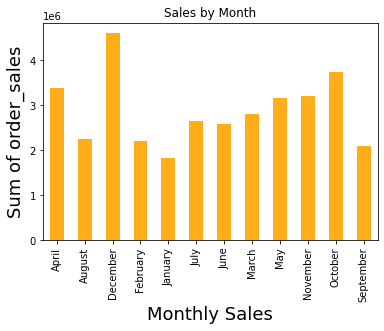

In [ ]:


counts = abd.groupby(['order_month']).sum()['order_sales']
result
counts.plot(kind='bar', title='Sales by Month',  color='orange', alpha=.9 );
plt.xlabel('Monthly Sales', fontsize=18)
plt.ylabel('Sum of order_sales', fontsize=18);

<a id='2'></a>
### What city had the highest number of sales?

<a id='3'></a>
### What is the best time for advertising to increase revenue through customer purchase?

<a id='4'></a>
### What products often sell together?

<a id='5'></a>
### What product sold the most and why?